# Import the libraries

In [1]:
from preprocessing_CNN import Train_Validation_Test_Split

import numpy as np
import pandas as pd

import pickle as pk

import os
import shutil

import cv2 
import matplotlib.pyplot as plt
%matplotlib inline 

from keras import layers
from keras import models
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

# Data pre-processing

## Train-Validation-Test Split

In [2]:
c_train, d_train, c_val, d_val, c_test, d_test = Train_Validation_Test_Split('cats', 'dogs')

Final number of cat pictures: 12500
Final number of dog pictures: 12500

-----------------------------------------------------------------

Start to determine test, validation and train part
Stop to determine test, validation and train part

Start to set folder structure
Stop to set folder structure

Start copying the determined images to the appropriate folders
Stop copying the determined images to the appropriate folders

-----------------------------------------------------------------

          The final data breakdown is as follows:

Total training cat images: 7500
Total training dog images: 7500

Total validation cat images: 2500
Total validation dog images: 2500

Total test cat images: 2500
Total test dog images: 2500


## Obtaining the lists of randomly selected images

In [3]:
list_cats_training = c_train
list_dogs_training = d_train

list_cats_validation = c_val
list_dogs_validation = d_val

list_cats_test = c_test
list_dogs_test = d_test

## Determination of the directories

In [4]:
root_directory = os.getcwd()

train_dir = os.path.join(root_directory, 'cats_and_dogs\\train')
validation_dir = os.path.join(root_directory, 'cats_and_dogs\\validation')
test_dir = os.path.join(root_directory, 'cats_and_dogs\\test')

## Obtain the total number of training, validation and test images

In [5]:
num_cats_img_train = len(list_cats_training)
num_dogs_img_train = len(list_dogs_training)

num_train_images_total = num_cats_img_train + num_dogs_img_train

print('Total training cat images: ' + str(num_cats_img_train))
print('Total training dog images: ' + str(num_dogs_img_train))
print()
print('Total training images: ' + str(num_train_images_total))

Total training cat images: 7500
Total training dog images: 7500

Total training images: 15000


In [6]:
num_cats_img_validation = len(list_cats_validation)
num_dogs_img_validation = len(list_dogs_validation)

num_validation_images_total = num_cats_img_validation + num_dogs_img_validation

print('Total validation cat images: ' + str(num_cats_img_validation))
print('Total validation dog images: ' + str(num_dogs_img_validation))
print()
print('Total validation images: ' + str(num_validation_images_total))

Total validation cat images: 2500
Total validation dog images: 2500

Total validation images: 5000


In [7]:
num_cats_img_test = len(list_cats_test)
num_dogs_img_test = len(list_dogs_test)

num_test_images_total = num_cats_img_test + num_dogs_img_test

print('Total test cat images: ' + str(num_cats_img_test))
print('Total test dog images: ' + str(num_dogs_img_test))
print()
print('Total test images: ' + str(num_test_images_total))

Total test cat images: 2500
Total test dog images: 2500

Total test images: 5000


# Descriptive Statistics

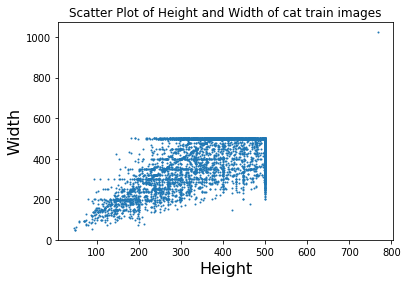

In [8]:
root_directory = os.getcwd()
train_files_cats_dir = os.path.join(root_directory, 'cats_and_dogs\\train\\cats')

height, width = [], []

fnames = ['cat{}.jpg'.format(i) for i in list_cats_training]
for fname in fnames:
    img_name = os.path.join(train_files_cats_dir, fname)
    img = cv2.imread(img_name)
    height.append(img.shape[0])
    width.append(img.shape[1])

plt.scatter(height,width, s=1)
plt.xlabel('Height', fontsize=16)
plt.ylabel('Width', fontsize=16)
plt.title('Scatter Plot of Height and Width of cat train images')
plt.show()    

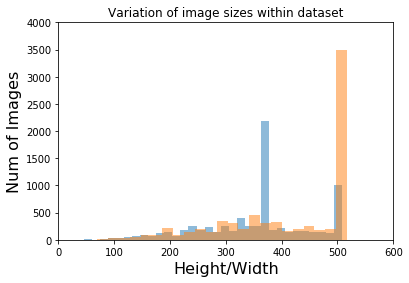

In [9]:
plt.hist(height,bins = 50, alpha=0.5)
plt.hist(width,bins = 50,alpha=0.5)
plt.axis([0,600,0,4000])
plt.xlabel('Height/Width', fontsize=16)
plt.ylabel('Num of Images', fontsize=16)
plt.title('Variation of image sizes within dataset')
plt.show()

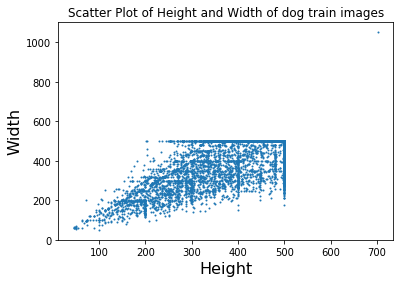

In [10]:
root_directory = os.getcwd()
train_files_dogs_dir = os.path.join(root_directory, 'cats_and_dogs\\train\\dogs')

height, width = [], []

fnames = ['dog{}.jpg'.format(i) for i in list_dogs_training]
for fname in fnames:
    img_name = os.path.join(train_files_dogs_dir, fname)
    img = cv2.imread(img_name)
    height.append(img.shape[0])
    width.append(img.shape[1])

plt.scatter(height,width, s=1)
plt.xlabel('Height', fontsize=16)
plt.ylabel('Width', fontsize=16)
plt.title('Scatter Plot of Height and Width of dog train images')
plt.show() 

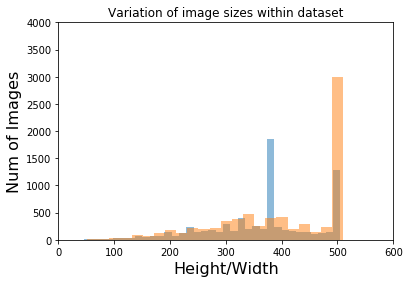

In [11]:
plt.hist(height,bins = 50, alpha=0.5)
plt.hist(width,bins = 50,alpha=0.5)
plt.axis([0,600,0,4000])
plt.xlabel('Height/Width', fontsize=16)
plt.ylabel('Num of Images', fontsize=16)
plt.title('Variation of image sizes within dataset')
plt.show()

# Simple CNN

## Name Definitions

In [12]:
checkpoint_no = 'ckpt_1_simple_CNN'

model_name = 'Cats_Dogs_CNN_4_Conv_F32_64_128_128_epoch_30'

## Parameter Settings

In [13]:
img_height = 150
img_width = 150
input_shape = (img_height, img_width, 3)

n_batch_size = 32

n_steps_per_epoch = int(num_train_images_total / n_batch_size)
n_validation_steps = int(num_validation_images_total / n_batch_size)
n_test_steps = int(num_test_images_total / n_batch_size)

n_epochs = 30

print('Input Shape: '+'('+str(img_height)+', '+str(img_width)+', ' + str(3)+')')
print('Batch Size: ' + str(n_batch_size))
print()
print('Steps per Epoch: ' + str(n_steps_per_epoch))
print()
print('Validation Steps: ' + str(n_validation_steps))
print('Test Steps: ' + str(n_test_steps))
print()
print('Number of Epochs: ' + str(n_epochs))

Input Shape: (150, 150, 3)
Batch Size: 32

Steps per Epoch: 468

Validation Steps: 156
Test Steps: 156

Number of Epochs: 30


## Instantiating a small CNN

### Layer Structure

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### Configuring the model for training

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Using ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=n_batch_size,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_height, img_width),
        batch_size=n_batch_size,
        class_mode='binary')

Found 15000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Callbacks

In [18]:
# Prepare a directory to store all the checkpoints.
checkpoint_dir = './'+ checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

In [ ]:
keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, 
                                   monitor='val_loss', save_best_only=True, mode='auto')]

## Fitting the model

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=n_steps_per_epoch,
      epochs=n_epochs,
      validation_data=validation_generator,
      validation_steps=n_validation_steps,
      callbacks=keras_callbacks)

Epoch 1/30
468/468 [==============================] - 231s 492ms/step - loss: 0.6866 - accuracy: 0.5490 - val_loss: 0.6556 - val_accuracy: 0.6220
INFO:tensorflow:Assets written to: ./ckpt_1_simple_CNN\Cats_Dogs_CNN_4_Conv_F32_64_128_128_epoch_30\assets
Epoch 2/30
468/468 [==============================] - 186s 398ms/step - loss: 0.6142 - accuracy: 0.6592 - val_loss: 0.5378 - val_accuracy: 0.7175
INFO:tensorflow:Assets written to: ./ckpt_1_simple_CNN\Cats_Dogs_CNN_4_Conv_F32_64_128_128_epoch_30\assets
Epoch 3/30
468/468 [==============================] - 185s 396ms/step - loss: 0.5075 - accuracy: 0.7492 - val_loss: 0.5018 - val_accuracy: 0.7496
INFO:tensorflow:Assets written to: ./ckpt_1_simple_CNN\Cats_Dogs_CNN_4_Conv_F32_64_128_128_epoch_30\assets
Epoch 4/30
468/468 [==============================] - 183s 392ms/step - loss: 0.4275 - accuracy: 0.8058 - val_loss: 0.3969 - val_accuracy: 0.8227
INFO:tensorflow:Assets written to: ./ckpt_1_simple_CNN\Cats_Dogs_CNN_4_Conv_F32_64_128_128_epoc

## Obtaining the best model values

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1
cols = list(hist_df.columns)
cols = [cols[-1]] + cols[:-1]
hist_df = hist_df[cols]
hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')
hist_df.head()

,epoch,loss,accuracy,val_loss,val_accuracy
0,1,0.671555,0.577833,0.655552,0.621995
1,2,0.584563,0.688402,0.537813,0.717548
2,3,0.494786,0.758819,0.501836,0.749599
3,4,0.417285,0.809727,0.396941,0.822716
4,5,0.346709,0.843332,0.380091,0.832332


In [ ]:
values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]
values_of_best_model

,epoch,loss,accuracy,val_loss,val_accuracy
6,7,0.226304,0.908471,0.358328,0.852564


## Obtaining class assignments

In [ ]:
class_assignment = train_generator.class_indices

df = pd.DataFrame([class_assignment], columns=class_assignment.keys())
df_stacked = df.stack()
df_temp = pd.DataFrame(df_stacked).reset_index().drop(['level_0'], axis=1)
df_temp.columns = ['Category', 'Allocated Number']
df_temp.to_csv(checkpoint_no + '/' + 'class_assignment_df_' + model_name + '.csv')

print('Class assignment:', str(class_assignment))

Class assignment: {'cats': 0, 'dogs': 1}


## Validation

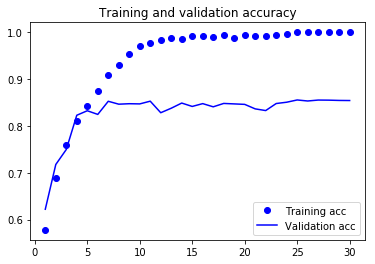

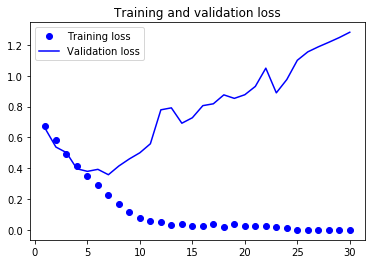

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Load best model

In [ ]:
# Loading the automatically saved model
model_reloaded = load_model(checkpoint_no + '/' + model_name)

# Saving the best model in the correct path and format
root_directory = os.getcwd()
checkpoint_dir = os.path.join(root_directory, checkpoint_no)
model_name_temp = os.path.join(checkpoint_dir, model_name + '.h5')
model_reloaded.save(model_name_temp)

# Deletion of the automatically created folder under Model Checkpoint File.
folder_name_temp = os.path.join(checkpoint_dir, model_name)
shutil.rmtree(folder_name_temp, ignore_errors=True)

In [ ]:
best_model = load_model(model_name_temp)

## Model Testing

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=n_batch_size,
        class_mode='binary')

test_loss, test_acc = best_model.evaluate(test_generator, steps=n_test_steps)
print()
print('Test Accuracy:', test_acc)

Found 5000 images belonging to 2 classes.
156/156 [==============================] - 32s 207ms/step - loss: 0.3496 - accuracy: 0.8552s - loss: 0.3513 - accuracy: 

Test Accuracy: 0.8551682829856873


# CNN with Data Augmentation

## Name Definitions

In [141]:
checkpoint_no = 'ckpt_2_CNN_with_augm'

model_name = 'Cats_Dogs_CNN_4_Conv_F32_64_128_128_epoch_60_es'

## Parameter Settings

In [142]:
img_height = 150
img_width = 150
input_shape = (img_height, img_width, 3)

n_batch_size = 64

n_steps_per_epoch = int(num_train_images_total / n_batch_size)
n_validation_steps = int(num_validation_images_total / n_batch_size)
n_test_steps = int(num_test_images_total / n_batch_size)

n_epochs = 60

print('Input Shape: '+'('+str(img_height)+', '+str(img_width)+', ' + str(3)+')')
print('Batch Size: ' + str(n_batch_size))
print()
print('Steps per Epoch: ' + str(n_steps_per_epoch))
print()
print('Validation Steps: ' + str(n_validation_steps))
print('Test Steps: ' + str(n_test_steps))
print()
print('Number of Epochs: ' + str(n_epochs))

Input Shape: (150, 150, 3)
Batch Size: 64

Steps per Epoch: 234

Validation Steps: 78
Test Steps: 78

Number of Epochs: 70


## Instantiating a CNN with data augmentation

### Layer Structure

In [168]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [169]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 128)      

### Configuring the model for training

In [145]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Using ImageDataGenerator with data augmentation

In [146]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

validation_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=n_batch_size,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_height, img_width),
        batch_size=n_batch_size,
        class_mode='binary')

Found 15000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Callbacks

In [147]:
# Prepare a directory to store all the checkpoints.
checkpoint_dir = './'+ checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

In [148]:
keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, 
                                   monitor='val_loss', save_best_only=True, mode='auto'),
                   EarlyStopping(monitor='val_loss', patience=5, mode='auto', 
                                 min_delta = 0, verbose=1)]

## Fitting the model

In [149]:
history = model.fit(
      train_generator,
      steps_per_epoch=n_steps_per_epoch,
      epochs=n_epochs,
      validation_data=validation_generator,
      validation_steps=n_validation_steps,
      callbacks=keras_callbacks)

Epoch 1/70
234/234 [==============================] - 179s 763ms/step - loss: 0.6956 - accuracy: 0.5091 - val_loss: 0.6498 - val_accuracy: 0.6322
INFO:tensorflow:Assets written to: ./ckpt_2_CNN_with_augm\Cats_Dogs_CNN_4_Conv_F32_64_128_128_epoch_60_es\assets
Epoch 2/70
234/234 [==============================] - 198s 844ms/step - loss: 0.6652 - accuracy: 0.5955 - val_loss: 0.6192 - val_accuracy: 0.6534
INFO:tensorflow:Assets written to: ./ckpt_2_CNN_with_augm\Cats_Dogs_CNN_4_Conv_F32_64_128_128_epoch_60_es\assets
Epoch 3/70
234/234 [==============================] - 200s 855ms/step - loss: 0.6337 - accuracy: 0.6442 - val_loss: 0.5895 - val_accuracy: 0.7013
INFO:tensorflow:Assets written to: ./ckpt_2_CNN_with_augm\Cats_Dogs_CNN_4_Conv_F32_64_128_128_epoch_60_es\assets
Epoch 4/70
234/234 [==============================] - 196s 838ms/step - loss: 0.6095 - accuracy: 0.6741 - val_loss: 0.5464 - val_accuracy: 0.7220
INFO:tensorflow:Assets written to: ./ckpt_2_CNN_with_augm\Cats_Dogs_CNN_4_Con

Epoch 40/70
234/234 [==============================] - 181s 771ms/step - loss: 0.2853 - accuracy: 0.8765 - val_loss: 0.2119 - val_accuracy: 0.9125
Epoch 41/70
234/234 [==============================] - 180s 770ms/step - loss: 0.2854 - accuracy: 0.8786 - val_loss: 0.2864 - val_accuracy: 0.8788
Epoch 42/70
234/234 [==============================] - 178s 762ms/step - loss: 0.2870 - accuracy: 0.8742 - val_loss: 0.2205 - val_accuracy: 0.9073
Epoch 43/70
234/234 [==============================] - 181s 771ms/step - loss: 0.2894 - accuracy: 0.8750 - val_loss: 0.2385 - val_accuracy: 0.8954
Epoch 44/70
234/234 [==============================] - 178s 758ms/step - loss: 0.2714 - accuracy: 0.8814 - val_loss: 0.2186 - val_accuracy: 0.9151
Epoch 00044: early stopping


## Obtaining the best model values

In [150]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1
cols = list(hist_df.columns)
cols = [cols[-1]] + cols[:-1]
hist_df = hist_df[cols]
hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')
hist_df.head()

,epoch,loss,accuracy,val_loss,val_accuracy
0,1,0.688048,0.532606,0.649775,0.632212
1,2,0.658551,0.606789,0.619248,0.653446
2,3,0.624214,0.652450,0.589482,0.701322
3,4,0.605053,0.677758,0.546368,0.721955
4,5,0.581075,0.692756,0.532267,0.733373


In [151]:
values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]
values_of_best_model

,epoch,loss,accuracy,val_loss,val_accuracy
38,39,0.288496,0.874866,0.210543,0.912861


## Obtaining class assignments

In [152]:
class_assignment = train_generator.class_indices

df = pd.DataFrame([class_assignment], columns=class_assignment.keys())
df_stacked = df.stack()
df_temp = pd.DataFrame(df_stacked).reset_index().drop(['level_0'], axis=1)
df_temp.columns = ['Category', 'Allocated Number']
df_temp.to_csv(checkpoint_no + '/' + 'class_assignment_df_' + model_name + '.csv')

print('Class assignment:', str(class_assignment))

Class assignment: {'cats': 0, 'dogs': 1}


## Validation

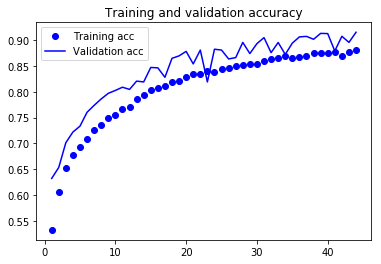

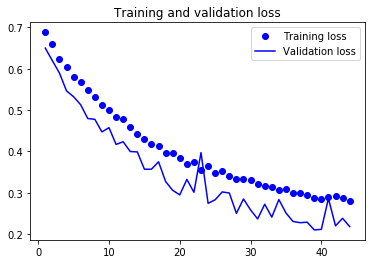

In [153]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Load best model

In [154]:
# Loading the automatically saved model
model_reloaded = load_model(checkpoint_no + '/' + model_name)

# Saving the best model in the correct path and format
root_directory = os.getcwd()
checkpoint_dir = os.path.join(root_directory, checkpoint_no)
model_name_temp = os.path.join(checkpoint_dir, model_name + '.h5')
model_reloaded.save(model_name_temp)

# Deletion of the automatically created folder under Model Checkpoint File.
folder_name_temp = os.path.join(checkpoint_dir, model_name)
shutil.rmtree(folder_name_temp, ignore_errors=True)

In [155]:
best_model = load_model(model_name_temp)

## Model Testing

In [156]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=n_batch_size,
        class_mode='binary')

test_loss, test_acc = best_model.evaluate(test_generator, steps=n_test_steps)
print()
print('Test Accuracy:', test_acc)

Found 5000 images belonging to 2 classes.
78/78 [==============================] - 12s 146ms/step - loss: 0.2287 - accuracy: 0.9012

Test Accuracy: 0.9012419581413269


In [157]:
pk.dump(img_height, open(checkpoint_dir+ '\\' +'img_height.pkl', 'wb'))
pk.dump(img_width, open(checkpoint_dir+ '\\' +'img_width.pkl', 'wb'))

# Test Predictions

In [167]:
# Load the categories
df = pd.read_csv('ckpt_2_CNN_with_augm/class_assignment_df_Cats_Dogs_CNN_4_Conv_F32_64_128_128_epoch_60_es.csv')
df = df.sort_values(by='Allocated Number', ascending=True)
CATEGORIES = df['Category'].to_list()

# Load the used image height and width
img_height_reload = pk.load(open("ckpt_2_CNN_with_augm/img_height.pkl",'rb'))
img_width_reload = pk.load(open("ckpt_2_CNN_with_augm/img_width.pkl",'rb'))


print('CATEGORIES : ' + str(CATEGORIES))
print()
print('Used image height: ' + str(img_height_reload))
print('Used image width: ' + str(img_width_reload))

CATEGORIES : ['cats', 'dogs']

Used image height: 150
Used image width: 150


AxesImage(54,36;334.8x217.44)

------------------------------------
Predicted Class: cats
------------------------------------


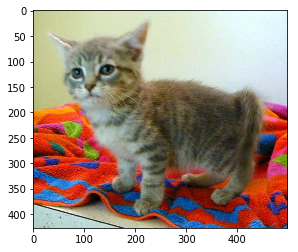

In [163]:
img_pred = cv2.imread('test_pictures/test_pic_cat_1.jpg')

print(plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)))

img_pred = cv2.resize(img_pred,(img_height_reload,img_width))
img_pred = np.reshape(img_pred,[1,img_height,img_width_reload,3])

classes = (best_model.predict(img_pred) > 0.5).astype("int32")

print()
print('------------------------------------')
print('Predicted Class: ' + CATEGORIES[int(classes[0])])
print('------------------------------------')

AxesImage(54,36;334.8x217.44)

------------------------------------
Predicted Class: cats
------------------------------------


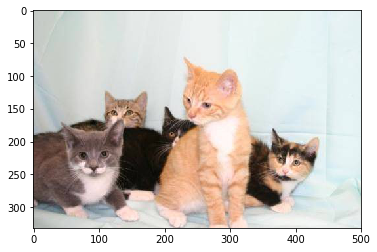

In [164]:
img_pred = cv2.imread('test_pictures/test_pic_cat_2.jpg')

print(plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)))

img_pred = cv2.resize(img_pred,(img_height_reload,img_width))
img_pred = np.reshape(img_pred,[1,img_height,img_width_reload,3])

classes = (best_model.predict(img_pred) > 0.5).astype("int32")

print()
print('------------------------------------')
print('Predicted Class: ' + CATEGORIES[int(classes[0])])
print('------------------------------------')

AxesImage(54,36;334.8x217.44)

------------------------------------
Predicted Class: dogs
------------------------------------


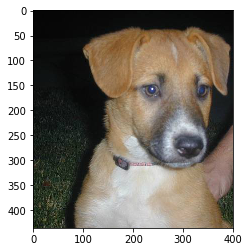

In [165]:
img_pred = cv2.imread('test_pictures/test_pic_dog_1.jpg')

print(plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)))

img_pred = cv2.resize(img_pred,(img_height_reload,img_width))
img_pred = np.reshape(img_pred,[1,img_height,img_width_reload,3])

classes = (best_model.predict(img_pred) > 0.5).astype("int32")

print()
print('------------------------------------')
print('Predicted Class: ' + CATEGORIES[int(classes[0])])
print('------------------------------------')

In [1]:
img_pred = cv2.imread('test_pictures/test_pic_dog_2.jpg')

print(plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)))

img_pred = cv2.resize(img_pred,(img_height_reload,img_width))
img_pred = np.reshape(img_pred,[1,img_height,img_width_reload,3])

classes = (best_model.predict(img_pred) > 0.5).astype("int32")

print()
print('------------------------------------')
print('Predicted Class: ' + CATEGORIES[int(classes[0])])
print('------------------------------------')

NameError: name 'cv2' is not defined